In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishantkukreti","key":"3d3f5fea6acd7e5c6fa53d12da93eb4a"}'}

In [3]:
import fastai

In [4]:
fastai.__version__

'1.0.61'

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-09 20:40:01          12020  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7320  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2923  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2870  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [9]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 87% 57.0M/65.2M [00:00<00:00, 63.7MB/s]
100% 65.2M/65.2M [00:00<00:00, 95.5MB/s]


In [19]:
!unzip emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [20]:
!pip install -Uqq fastbook


In [21]:
import fastbook
from fastbook import * 
from fastai.vision.widgets import *

In [27]:
path = '/content/train'


In [28]:
fns = get_image_files(path)
fns

(#28709) [Path('/content/train/disgusted/im55.png'),Path('/content/train/disgusted/im56.png'),Path('/content/train/disgusted/im142.png'),Path('/content/train/disgusted/im409.png'),Path('/content/train/disgusted/im342.png'),Path('/content/train/disgusted/im5.png'),Path('/content/train/disgusted/im4.png'),Path('/content/train/disgusted/im184.png'),Path('/content/train/disgusted/im367.png'),Path('/content/train/disgusted/im285.png')...]

In [29]:
failed = verify_images(fns)
failed

(#0) []

In [30]:
emotion = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=126),
    get_y=parent_label,
    item_tfms=Resize(128))

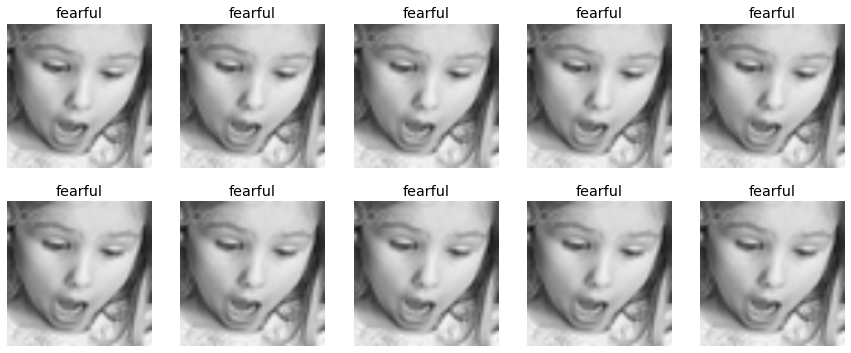

In [31]:
dls = emotion.dataloaders(path)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

In [32]:
learn = cnn_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.797233,1.506124,0.552949,04:42


epoch,train_loss,valid_loss,error_rate,time
0,1.197843,1.147416,0.419531,06:20
1,0.972053,1.051254,0.384464,06:22
2,0.623607,1.136069,0.372039,06:21
3,0.159882,1.397069,0.356015,06:21
4,0.031116,1.404905,0.355202,06:21


In [33]:
learn.export()


In [34]:
learn_inf = load_learner('/content/export.pkl')

In [35]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

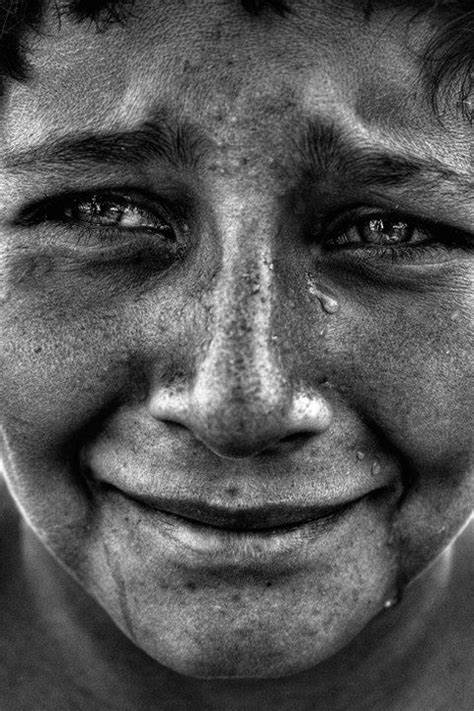

In [62]:
img = PILImage.create(btn_upload.data[-1])
img


In [63]:
# j = img.convert("grey")

In [64]:
pred , pred_idx , probs = learn_inf.predict(img) 

In [65]:
pred 

'sad'

In [66]:
probs

tensor([2.3249e-04, 4.0389e-04, 6.9254e-03, 2.3238e-01, 1.4938e-01, 6.0919e-01, 1.4929e-03])

In [ ]:
import pickle


In [ ]:
with open("emo.pkl", "wb") as f:
    pickle.dump(learn, f)

In [ ]:
model  = pickle.load(open("emo.pkl",'rb'))

In [ ]:
pred , pred_idx , probs = model.predict(img) 

In [ ]:
pred

'Happy'

In [ ]:
fastai.vesrion


NameError: ignored

In [ ]:
import fastai
fastai.__version__

'2.5.2'